## Importing package

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import os
import math

import ipywidgets as widgets
from IPython.display import display

## Data Wrangling

### Importing Data

In [58]:
data_frames = {}
data_folder_path = '../data'

for filename in os.listdir(data_folder_path):
    name = os.path.splitext(filename)[0]
    filepath = os.path.join(data_folder_path, filename)
    data_frames[name] = pd.read_csv(filepath)

print(data_frames)

{'product_checkout':              date  checkout_id  is_checkout  qty unit_price
0      2024-12-27      6119008            0    0  Rp 25.000
1      2024-12-27      7003039            0    0  Rp 25.000
2      2024-12-28      2570606            0    0  Rp 25.000
3      2024-12-28      7988659            1    3  Rp 25.000
4      2024-12-28      9540890            1    1  Rp 25.000
...           ...          ...          ...  ...        ...
10462  2025-06-01      9560732            1    2  Rp 25.000
10463  2025-06-01      9615881            0    0  Rp 25.000
10464  2025-06-01      9739102            0    0  Rp 25.000
10465  2025-06-01      9803864            0    0  Rp 25.000
10466  2025-06-01      9823285            0    0  Rp 25.000

[10467 rows x 5 columns], 'campaign_result':              date  campaign_id  user_id  checkout_id  is_click
0      2024-12-31            1        1      5073872       0.0
1      2024-12-31            1        2      5917917       0.0
2      2024-12-31       

In [59]:
data_frames['campaign_budget'].sort_values(by= 'date')

,date,campaign_id,budget
0,2024-12-31,1,15310
1,2024-12-31,2,17402
2,2025-01-01,1,18546
3,2025-01-01,2,14592
4,2025-01-02,1,16993
...,...,...,...
301,2025-05-30,2,17435
302,2025-05-31,1,16275
303,2025-05-31,2,16993
304,2025-06-01,1,14918


In [60]:
data_frames['campaign_result'].sort_values(by= 'date')

,date,campaign_id,user_id,checkout_id,is_click
0,2024-12-31,1,1,5073872,0.0
299,2024-12-31,2,32273,9177988,0.0
298,2024-12-31,2,32272,7019288,0.0
297,2024-12-31,2,32271,5551942,1.0
296,2024-12-31,2,32270,6957605,0.0
...,...,...,...,...,...
65289,2025-06-01,1,32147,4025058,0.0
65288,2025-06-01,1,32146,8713066,0.0
65287,2025-06-01,1,32145,9215035,0.0
65297,2025-06-01,1,32155,5606615,0.0


In [61]:
data_frames['product_checkout'].sort_values(by= 'date')

,date,checkout_id,is_checkout,qty,unit_price
0,2024-12-27,6119008,0,0,Rp 25.000
1,2024-12-27,7003039,0,0,Rp 25.000
2,2024-12-28,2570606,0,0,Rp 25.000
3,2024-12-28,7988659,1,3,Rp 25.000
4,2024-12-28,9540890,1,1,Rp 25.000
...,...,...,...,...,...
10435,2025-06-01,4408633,0,0,Rp 25.000
10436,2025-06-01,4417313,1,3,Rp 25.000
10437,2025-06-01,4449115,0,0,Rp 25.000
10426,2025-06-01,2948609,0,0,Rp 25.000


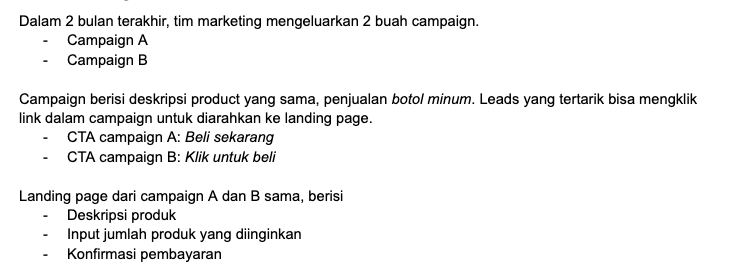

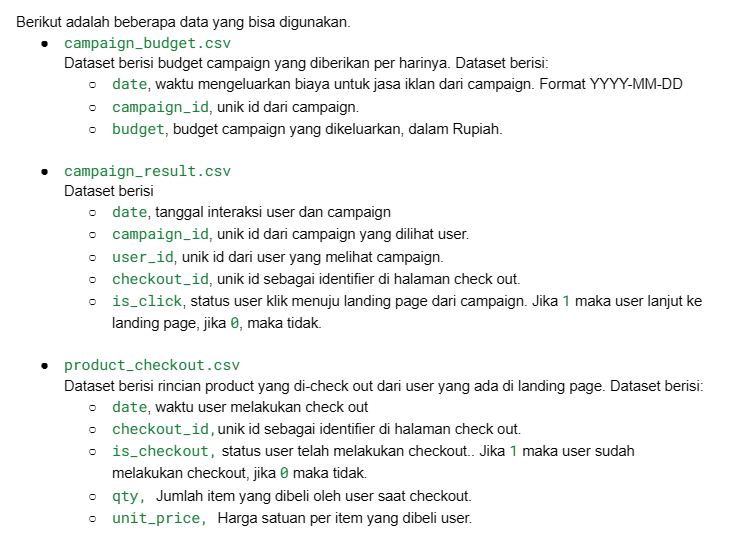

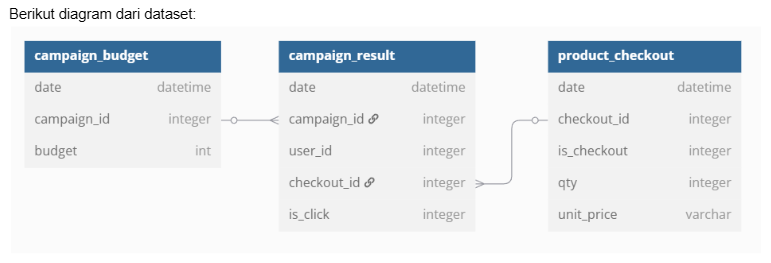

### Cleaning Data

#### campaign_budget

In [62]:
campaign_budget = data_frames['campaign_budget']
campaign_budget['date'] = pd.to_datetime(campaign_budget['date'], format= '%Y-%m-%d')
campaign_budget.info()
campaign_budget.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         306 non-null    datetime64[ns]
 1   campaign_id  306 non-null    int64         
 2   budget       306 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 7.3 KB


,date,campaign_id,budget
0,2024-12-31,1,15310
1,2024-12-31,2,17402
2,2025-01-01,1,18546
3,2025-01-01,2,14592
4,2025-01-02,1,16993


In [63]:
print("Checking per column : ")
print(f"Unique campaign_id : {campaign_budget['campaign_id'].unique()}")
print(f"Total budget isn't null or less than null : {(campaign_budget['budget'] <= 0).sum()}")
print(f"Total NaN date : {campaign_budget[campaign_budget['date'].isna()]['date'].count()}")
campaign_budget = campaign_budget[(campaign_budget['date'].dt.year >= 2025)]
last_60_days = campaign_budget.sort_values(by= ['date'], ascending= False)['date'].dt.month.unique()[1:3]
print(f"Last 60 days selected months : {last_60_days}")
campaign_budget = campaign_budget[(campaign_budget['date'].dt.month.isin(last_60_days))]
print(f"Date month unique : {campaign_budget['date'].dt.month.unique()}")
print(f"Total campaign_id 1 : {len(campaign_budget[campaign_budget['campaign_id'] == 1])}")
print(f"Total campaign_id 2 : {len(campaign_budget[campaign_budget['campaign_id'] == 2])}")
print(f"Number of NaN campaign ID : {sum(campaign_budget['campaign_id'].isna())}")
campaign_budget_by_date = campaign_budget.groupby(by= 'date')['campaign_id'].count().unique()
print(f"Unique total campaign per day : {campaign_budget_by_date}")

start_marketing_date_a = campaign_budget[campaign_budget['campaign_id'] == 1]['date'].min()
start_marketing_date_b = campaign_budget[campaign_budget['campaign_id'] == 2]['date'].min()
end_marketing_date_a = campaign_budget[campaign_budget['campaign_id'] == 1]['date'].max()
end_marketing_date_b = campaign_budget[campaign_budget['campaign_id'] == 2]['date'].max()
print(f"Start date marketing A : {start_marketing_date_a}")
print(f"Start date marketing B : {start_marketing_date_b}")
print(f"End date marketing A : {end_marketing_date_a}")
print(f"End date marketing B : {end_marketing_date_b}")

print(f"Total budget in last 2 months : {sum(campaign_budget['budget'])}")
print(f"Average budget in lasth 2 months : {round(campaign_budget['budget'].mean(), 2)}")

Checking per column : 
Unique campaign_id : [1 2]
Total budget isn't null or less than null : 0
Total NaN date : 0
Last 60 days selected months : [5 4]
Date month unique : [4 5]
Total campaign_id 1 : 61
Total campaign_id 2 : 61
Number of NaN campaign ID : 0
Unique total campaign per day : [2]
Start date marketing A : 2025-04-01 00:00:00
Start date marketing B : 2025-04-01 00:00:00
End date marketing A : 2025-05-31 00:00:00
End date marketing B : 2025-05-31 00:00:00
Total budget in last 2 months : 2001662
Average budget in lasth 2 months : 16407.07


(array([ 4.,  7., 17., 14., 19., 10., 19., 14., 13.,  5.]),
 array([13889. , 14375.9, 14862.8, 15349.7, 15836.6, 16323.5, 16810.4,
        17297.3, 17784.2, 18271.1, 18758. ]),
 <BarContainer object of 10 artists>)

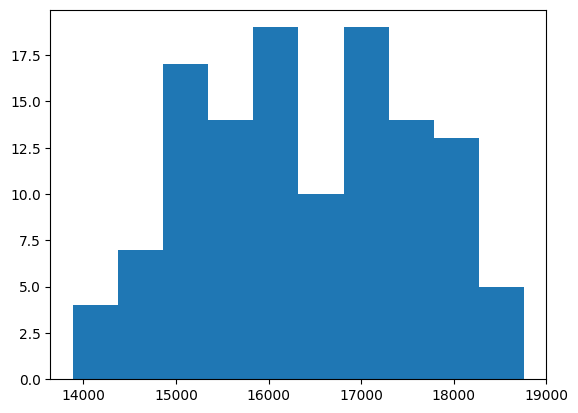

In [64]:
plt.hist(campaign_budget['budget'])

In [65]:
campaign_budget.info()
campaign_budget.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, 182 to 303
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         122 non-null    datetime64[ns]
 1   campaign_id  122 non-null    int64         
 2   budget       122 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 3.8 KB


,date,campaign_id,budget
182,2025-04-01,1,16765
183,2025-04-01,2,16977
184,2025-04-02,1,15082
185,2025-04-02,2,16928
186,2025-04-03,1,16748


#### campaign_result

In [66]:
campaign_result = data_frames['campaign_result']
campaign_result['date'] = pd.to_datetime(campaign_result['date'], format= '%Y-%m-%d')
campaign_result.info()
campaign_result

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65570 entries, 0 to 65569
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         65570 non-null  datetime64[ns]
 1   campaign_id  65570 non-null  int64         
 2   user_id      65570 non-null  int64         
 3   checkout_id  65570 non-null  int64         
 4   is_click     63990 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 2.5 MB


,date,campaign_id,user_id,checkout_id,is_click
0,2024-12-31,1,1,5073872,0.0
1,2024-12-31,1,2,5917917,0.0
2,2024-12-31,1,3,7493460,0.0
3,2024-12-31,1,4,9720866,0.0
4,2024-12-31,1,5,2969097,1.0
...,...,...,...,...,...
65565,2025-06-01,2,63196,8862467,0.0
65566,2025-06-01,2,63197,3108344,0.0
65567,2025-06-01,2,63198,5359421,0.0
65568,2025-06-01,2,63199,3146358,1.0


In [67]:
# Checking campaign_result 
print(f"Unique campaign_id : {campaign_result['campaign_id'].unique()}")
print(f"Number of duplicated checkout_id : {(campaign_result['checkout_id'].duplicated()).sum()}")
print(f"Number of duplicated user_id : {(campaign_result['user_id'].duplicated()).sum()}")
print(f"Unique is_click state : {campaign_result['is_click'].unique()}")
print(f"Check if checkout_id is duplicated : {(campaign_result['checkout_id'].duplicated()).sum()}")
print(f"Check if there's NaN date in campaign_result : {sum(campaign_result['date'].isna())}")
print(f"Check if there's missing user_id : {sum(campaign_result['user_id'].isna() + campaign_result['user_id'].isnull())}")

Unique campaign_id : [1 2]
Number of duplicated checkout_id : 0
Number of duplicated user_id : 2370
Unique is_click state : [ 0.  1. nan]
Check if checkout_id is duplicated : 0
Check if there's NaN date in campaign_result : 0
Check if there's missing user_id : 0


#### product_checkout

In [68]:
product_checkout = data_frames['product_checkout']
product_checkout['date'] = pd.to_datetime(product_checkout['date'], format= '%Y-%m-%d')
product_checkout.info()
product_checkout.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10467 entries, 0 to 10466
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         10467 non-null  datetime64[ns]
 1   checkout_id  10467 non-null  int64         
 2   is_checkout  10467 non-null  int64         
 3   qty          10467 non-null  int64         
 4   unit_price   10467 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 409.0+ KB


,date,checkout_id,is_checkout,qty,unit_price
0,2024-12-27,6119008,0,0,Rp 25.000
1,2024-12-27,7003039,0,0,Rp 25.000
2,2024-12-28,2570606,0,0,Rp 25.000
3,2024-12-28,7988659,1,3,Rp 25.000
4,2024-12-28,9540890,1,1,Rp 25.000


In [69]:
print(f"Check if checkout_id is duplicated : {(product_checkout['checkout_id'].duplicated()).sum()}")
print(f"Unique is_checkout state : {product_checkout['is_checkout'].unique()}")
print(f"Check if qty have 0 or less than 0 : {(product_checkout['qty'] < 0).sum()}")
print(f"Check data type of unit_price : {product_checkout['unit_price'].dtypes} | {product_checkout['unit_price'].unique()}")

Check if checkout_id is duplicated : 0
Unique is_checkout state : [0 1]
Check if qty have 0 or less than 0 : 41
Check data type of unit_price : object | ['Rp 25.000']


In [70]:
if product_checkout['unit_price'].dtypes == object or product_checkout['unit_price'].dtypes == str:
    product_checkout['unit_price'] = product_checkout['unit_price'].str.replace('Rp', '',).str.replace('.', '').astype(int)

else :
    pass

product_checkout = product_checkout[product_checkout['qty'] >= 0 ]
print(f"Check if qty have 0 or less than 0 : {(product_checkout['qty'] < 0).sum()}")
print(product_checkout['unit_price'].dtypes)
product_checkout['total_sales'] = product_checkout['qty'] * product_checkout['unit_price']
product_checkout

Check if qty have 0 or less than 0 : 0
int64


/tmp/ipykernel_5013/1625539046.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_checkout['total_sales'] = product_checkout['qty'] * product_checkout['unit_price']


,date,checkout_id,is_checkout,qty,unit_price,total_sales
0,2024-12-27,6119008,0,0,25000,0
1,2024-12-27,7003039,0,0,25000,0
2,2024-12-28,2570606,0,0,25000,0
3,2024-12-28,7988659,1,3,25000,75000
4,2024-12-28,9540890,1,1,25000,25000
...,...,...,...,...,...,...
10462,2025-06-01,9560732,1,2,25000,50000
10463,2025-06-01,9615881,0,0,25000,0
10464,2025-06-01,9739102,0,0,25000,0
10465,2025-06-01,9803864,0,0,25000,0


#### Merging data frames

In [71]:
main_df = campaign_result.copy()
print(sum(main_df['is_click'].isna()))
# main_df = main_df.join(product_checkout.set_index('checkout_id'), how='right', on= 'checkout_id', lsuffix= '_result', rsuffix= '_checkout')
main_df = main_df.merge(product_checkout, on='checkout_id', how= 'left', suffixes=('_result', '_checkout'))
main_df['start_marketing'] = main_df['campaign_id'].map({
    1 : start_marketing_date_a,
    2 : start_marketing_date_b
})

main_df = main_df[(main_df['date_result'] >= main_df['start_marketing'])]
main_df['is_click'].unique()
main_df


1580


,date_result,campaign_id,user_id,checkout_id,is_click,date_checkout,is_checkout,qty,unit_price,total_sales,start_marketing
39103,2025-04-01,1,19125,3125247,0.0,NaT,NaN,NaN,NaN,NaN,2025-04-01
39104,2025-04-01,1,19126,3595112,0.0,NaT,NaN,NaN,NaN,NaN,2025-04-01
39105,2025-04-01,1,19127,6129707,NaN,NaT,NaN,NaN,NaN,NaN,2025-04-01
39106,2025-04-01,1,19128,2204955,1.0,2025-04-01,0.0,0.0,25000.0,0.0,2025-04-01
39107,2025-04-01,1,19129,6703486,0.0,NaT,NaN,NaN,NaN,NaN,2025-04-01
...,...,...,...,...,...,...,...,...,...,...,...
65565,2025-06-01,2,63196,8862467,0.0,NaT,NaN,NaN,NaN,NaN,2025-04-01
65566,2025-06-01,2,63197,3108344,0.0,NaT,NaN,NaN,NaN,NaN,2025-04-01
65567,2025-06-01,2,63198,5359421,0.0,NaT,NaN,NaN,NaN,NaN,2025-04-01
65568,2025-06-01,2,63199,3146358,1.0,2025-06-01,1.0,1.0,25000.0,25000.0,2025-04-01


In [72]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26467 entries, 39103 to 65569
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date_result      26467 non-null  datetime64[ns]
 1   campaign_id      26467 non-null  int64         
 2   user_id          26467 non-null  int64         
 3   checkout_id      26467 non-null  int64         
 4   is_click         25855 non-null  float64       
 5   date_checkout    3387 non-null   datetime64[ns]
 6   is_checkout      3387 non-null   float64       
 7   qty              3387 non-null   float64       
 8   unit_price       3387 non-null   float64       
 9   total_sales      3387 non-null   float64       
 10  start_marketing  26467 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(5), int64(3)
memory usage: 2.4 MB


### EDA

In [73]:
def calculate_engagement_rate(data_frame):

    ''' 
    This function is used for calculate Engagement Rate

    num_engangement : total of leads did click (because only click is available)
    num_impressions : total of users interact with campaign
    
    '''

    engagement_rate = []
    
    for campaign_id in data_frame['campaign_id'].unique():
        num_engagements =  len(data_frame[(data_frame['campaign_id'] == campaign_id) & (data_frame['is_click'] == 1)]['user_id'].unique())
        num_impressions = len(data_frame[data_frame['campaign_id'] == campaign_id]['user_id'].unique())

        engagement_rate.append(num_engagements / num_impressions)

    return engagement_rate

def calculate_ctr(data_frame):

    ''' 
    This function is used to calculate Click Through Rate (CTR)

    total_conversions : total of leads clicked to go landing page (possible double click or more)
    total_interactions : total of users interact with campaign

    '''
    
    ctr_val = []
    for campaign_id in data_frame['campaign_id'].unique():
        total_conversions = len(data_frame[(data_frame['campaign_id'] == campaign_id) & (data_frame['is_click'] == 1)]['user_id'])
        total_interactions = len(data_frame[data_frame['campaign_id'] == campaign_id]['user_id'])
        ctr_val.append(total_conversions / total_interactions)

    return ctr_val

def calculate_conversion_rate(data_frame):

    ''' 
    This function is used to calculate Conversion Rate 

    total_buyer : total of leads that checkout / buy something
    total_interactions : total of users that interact with campaign

    '''
    
    data_frame = data_frame[(data_frame['date_checkout'] >= data_frame['date_result'])]

    conversion_rate = []

    for campaign_id in  data_frame['campaign_id'].unique():
        total_buyer = len(data_frame[(data_frame['campaign_id'] == campaign_id) & (data_frame['is_checkout'] == 1) & (data_frame['is_click'] == 1)]['checkout_id'].unique())
        total_interactions = len(data_frame[(data_frame['campaign_id'] == campaign_id) & (data_frame['is_click'] == 1)]['user_id'])
        # print(total_buyer, total_interactions)
        conversion_rate.append(total_buyer / total_interactions)

    return conversion_rate

def calculate_revenue(data_frame, campaign_df):

    total_sales = sum(data_frame['total_sales'])
    total_marketing_spend = sum(campaign_df['budget'])
    
    revenue = total_sales - total_marketing_spend

    return revenue

def calculate_cpl(data_frame, total_budget):

    ''' 
    This function is used to calculate Cost Per Lead (CPL)

    total_budget : total spend of marketing campaign
    num_leads : total of users that clicked to go landing page

    '''
    cpl_val = []
    counter = 0
    
    for campaign_id in data_frame['campaign_id'].unique():
        num_leads = len(data_frame[(data_frame['campaign_id'] == campaign_id) & (data_frame['is_click'] == 1)]['user_id'].unique())
        cpl_val.append(total_budget[counter] / num_leads)
        counter += 1

    counter = 0 # reset counter
    return cpl_val

def calculate_cac(data_frame, total_budget):

    ''' 
    This function is used to calculate Customer Acquisition Cost (CAC)

    total_budget : total spend of marketing campaign
    new_customers : customer that buy something after campaign happened

    '''
    cac_val = []
    counter = 0

    for campaign_id in data_frame['campaign_id'].unique():
        new_customers = len(data_frame[(data_frame['campaign_id'] == campaign_id) & (data_frame['is_checkout'] == 1)]['user_id'].unique())
        cac_val.append(total_budget[counter] / new_customers)
        counter += 1

    counter = 0 # reset counter
    return cac_val

def calculate_revenue(data_frame) :

    total_revenue = []

    data_frame = data_frame[(data_frame['date_checkout'] >= data_frame['date_result']) & (data_frame['is_click'] == 1) & (data_frame['is_checkout'] == 1) & (~data_frame['total_sales'].isna())]

    for campaign_id in data_frame['campaign_id'].unique():
        total_revenue.append(sum(data_frame[data_frame['campaign_id'] == campaign_id]['total_sales']))

    return total_revenue


def estimate_marketing_budget(target, target_type : str , cpl, cac):

    if target_type.lower() == 'leads':
        budget_estimated = target * cpl
    elif target_type.lower() == 'customer' or target_type.lower() == 'buyer':
        budget_estimated = target * cac
    else :
        return "can't find any correct target type"

    return budget_estimated

#### Effectiveness exploration

##### Engagement exploration

In [74]:
engagement_rate_a, engagement_rate_b = calculate_engagement_rate(main_df)
ctr_a, ctr_b = calculate_ctr(main_df)

print(f"Total engagement rate A : {round(engagement_rate_a * 100, 2)}%")
print(f"Total engagement rate B : {round(engagement_rate_b * 100, 2)}%")
print(f"Total engagement ctr A : {round(ctr_a * 100, 2)}%")
print(f"Total engagement ctr B : {round(ctr_b * 100, 2)}%")

Total engagement rate A : 13.7%
Total engagement rate B : 13.94%
Total engagement ctr A : 13.7%
Total engagement ctr B : 13.94%


##### Davis Engagement 

<Axes: xlabel='date_result'>

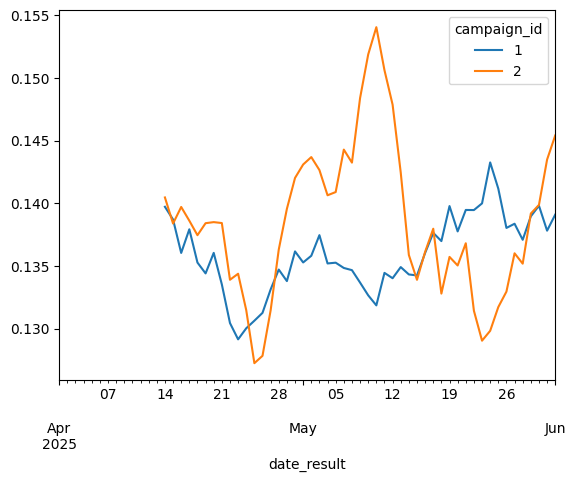

In [75]:
daily_counts_eng = main_df.copy()
daily_counts_eng = daily_counts_eng.groupby(['date_result', 'campaign_id']).agg({'user_id' : 'count', 'is_click' : 'sum'}).reset_index()
daily_counts_eng = pd.pivot(daily_counts_eng, index= 'date_result', columns= 'campaign_id', values=['user_id', 'is_click'])
daily_counts_eng = daily_counts_eng.rolling(window= 14).mean()

# daily_counts_engg = daily_counts_engg.reset_index()
daily_counts_eng[('engagement_rate', 1)] = daily_counts_eng[('is_click', 1)] / daily_counts_eng[('user_id', 1)]
daily_counts_eng[('engagement_rate', 2)] = daily_counts_eng[('is_click', 2)] / daily_counts_eng[('user_id', 2)]

daily_counts_eng['engagement_rate'].plot.line()

<Axes: xlabel='date_result'>

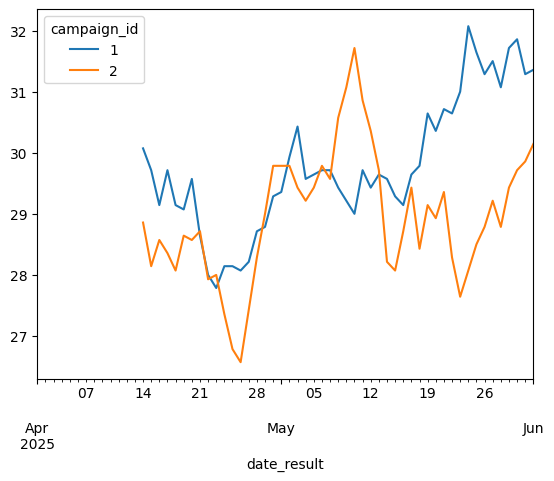

In [76]:
daily_counts_eng['is_click'].plot.line()

<Axes: xlabel='date_result'>

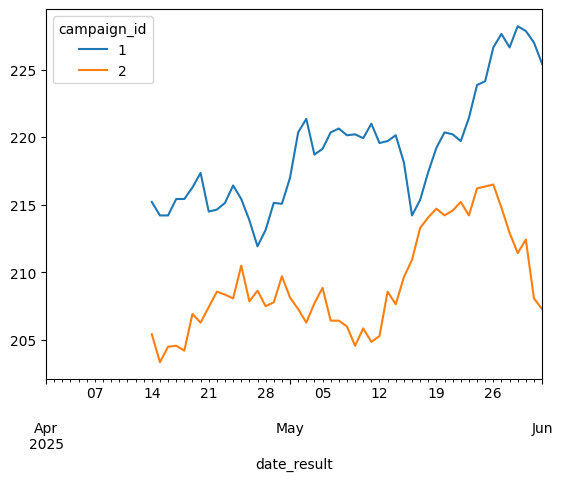

In [77]:
daily_counts_eng['user_id'].plot.line()

##### Conversion rate exploration

In [78]:
conversion_rate_a, conversion_rate_b = calculate_conversion_rate(main_df)

print(f"Conversion rate A : {round(conversion_rate_a * 100, 2)}%")
print(f"Conversion rate B : {round(conversion_rate_b * 100, 2)}%")

Conversion rate A : 15.49%
Conversion rate B : 19.31%


##### Davis Conversion Rate

In [79]:
cleaned_checkout = main_df.copy()

cleaned_checkout = cleaned_checkout[(cleaned_checkout['date_checkout'] >= cleaned_checkout['date_result']) & (cleaned_checkout['is_click'] == 1)]
daily_counts_cvr = cleaned_checkout.groupby(['date_result', 'campaign_id']).agg({'is_click' : 'sum','is_checkout' : 'sum', 'total_sales' : 'sum'}).reset_index()
daily_counts_cvr
# daily_counts_cvr.head(20)

,date_result,campaign_id,is_click,is_checkout,total_sales
0,2025-04-01,1,28.0,3.0,325000.0
1,2025-04-01,2,27.0,1.0,50000.0
2,2025-04-02,1,28.0,1.0,100000.0
3,2025-04-02,2,22.0,2.0,50000.0
4,2025-04-03,1,25.0,2.0,75000.0
...,...,...,...,...,...
119,2025-05-30,2,29.0,4.0,125000.0
120,2025-05-31,1,29.0,10.0,1025000.0
121,2025-05-31,2,33.0,9.0,350000.0
122,2025-06-01,1,20.0,5.0,375000.0


(array([ 3.,  6., 13., 19., 24., 21., 25.,  4.,  6.,  3.]),
 array([13. , 15.5, 18. , 20.5, 23. , 25.5, 28. , 30.5, 33. , 35.5, 38. ]),
 <BarContainer object of 10 artists>)

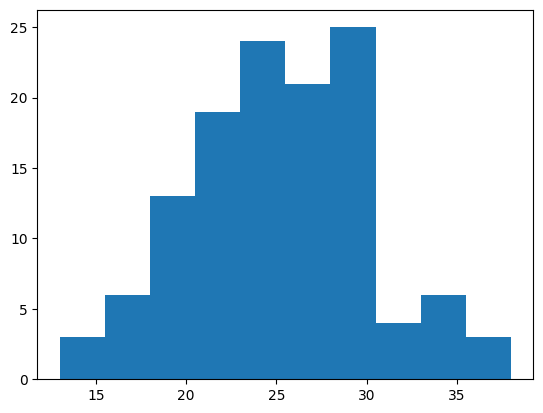

In [80]:
plt.hist(daily_counts_cvr['is_click'])

<Axes: xlabel='date_result'>

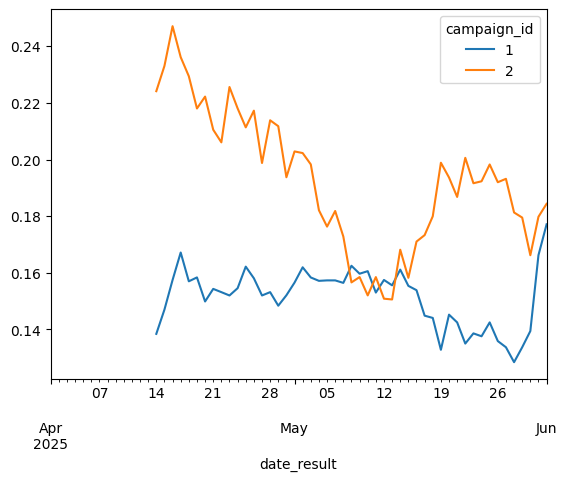

In [81]:
daily_counts_cvr = pd.pivot(daily_counts_cvr, index= 'date_result', columns= 'campaign_id', values= ['is_click','is_checkout', 'total_sales'])
daily_counts_cvr = daily_counts_cvr.rolling(window= 14).mean()

daily_counts_cvr[('cvr', 1)] = daily_counts_cvr[('is_checkout', 1)] / daily_counts_cvr[('is_click', 1)]
daily_counts_cvr[('cvr', 2)] = daily_counts_cvr[('is_checkout', 2)] / daily_counts_cvr[('is_click', 2)]
daily_counts_cvr['cvr'].plot.line()

<Axes: xlabel='date_result'>

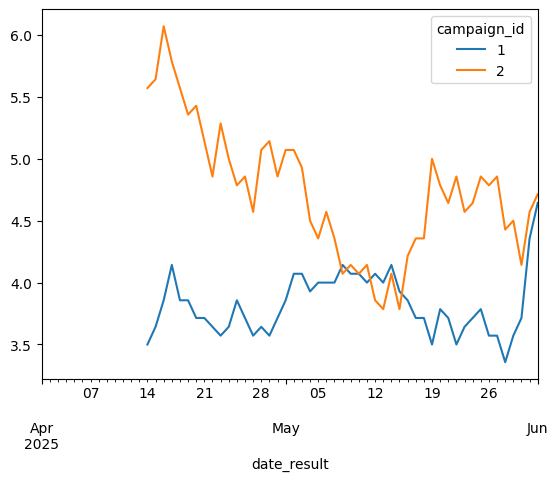

In [82]:
daily_counts_cvr['is_checkout'].plot.line()

(array([1.399e+03, 5.300e+01, 6.200e+01, 1.800e+01, 2.000e+01, 7.000e+00,
        8.000e+00, 4.000e+00, 1.000e+00, 3.000e+00]),
 array([     0.,  37500.,  75000., 112500., 150000., 187500., 225000.,
        262500., 300000., 337500., 375000.]),
 <BarContainer object of 10 artists>)

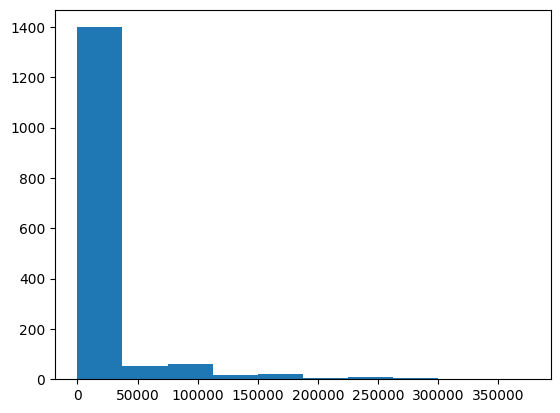

In [83]:
plt.hist(cleaned_checkout[cleaned_checkout['campaign_id'] == 1]['total_sales'])

(array([1.378e+03, 7.500e+01, 3.400e+01, 2.200e+01, 1.300e+01, 3.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([     0.,  30000.,  60000.,  90000., 120000., 150000., 180000.,
        210000., 240000., 270000., 300000.]),
 <BarContainer object of 10 artists>)

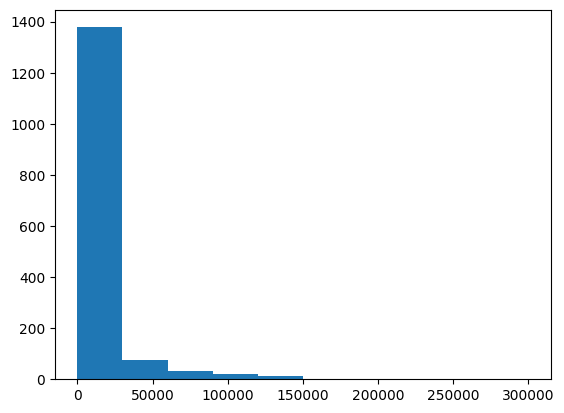

In [84]:
plt.hist(cleaned_checkout[cleaned_checkout['campaign_id'] == 2]['total_sales'])

(array([1.399e+03, 5.300e+01, 6.200e+01, 1.800e+01, 2.000e+01, 7.000e+00,
        8.000e+00, 4.000e+00, 1.000e+00, 3.000e+00]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <BarContainer object of 10 artists>)

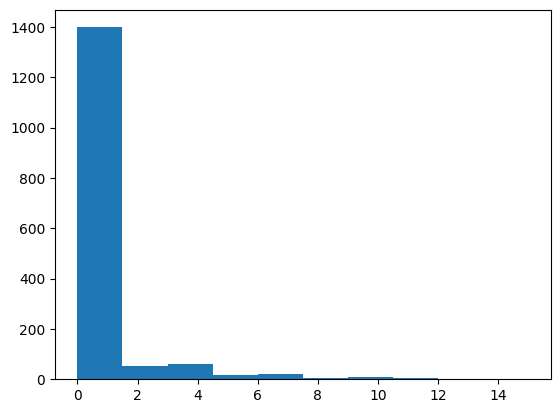

In [85]:
plt.hist(cleaned_checkout[cleaned_checkout['campaign_id'] == 1]['qty'])

(array([1.378e+03, 7.500e+01, 3.400e+01, 2.200e+01, 1.300e+01, 3.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <BarContainer object of 10 artists>)

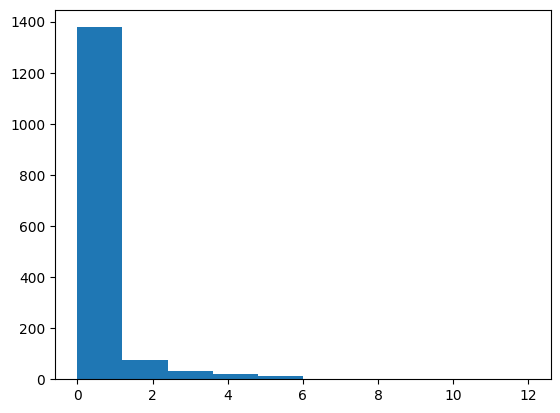

In [86]:
plt.hist(cleaned_checkout[cleaned_checkout['campaign_id'] == 2]['qty'])

In [87]:
print(cleaned_checkout[(cleaned_checkout['campaign_id'] == 1) & (cleaned_checkout['qty'] == cleaned_checkout[cleaned_checkout['campaign_id'] == 1]['qty'].max())])

      date_result  campaign_id  user_id  checkout_id  is_click date_checkout  \
55607  2025-05-10            1    27287      4661014       1.0    2025-05-10   
60131  2025-05-20            1    29549      3702131       1.0    2025-05-20   

       is_checkout   qty  unit_price  total_sales start_marketing  
55607          1.0  15.0     25000.0     375000.0      2025-04-01  
60131          1.0  15.0     25000.0     375000.0      2025-04-01  


In [88]:
print(cleaned_checkout[(cleaned_checkout['campaign_id'] == 2) & (cleaned_checkout['qty'] == cleaned_checkout[cleaned_checkout['campaign_id'] == 2]['qty'].max())])

      date_result  campaign_id  user_id  checkout_id  is_click date_checkout  \
40274  2025-04-03            2    51267      3769905       1.0    2025-04-03   

       is_checkout   qty  unit_price  total_sales start_marketing  
40274          1.0  12.0     25000.0     300000.0      2025-04-01  


In [89]:
cleaned_checkout['unit_price'].unique()

array([25000.])

##### Calculcate revenue

In [90]:
revenue_a, revenue_b = calculate_revenue(main_df)
qty_a = sum(cleaned_checkout[(cleaned_checkout['is_click'] == 1) & (cleaned_checkout['is_checkout'] == 1) & (cleaned_checkout['campaign_id'] == 1)]['qty'])
qty_b = sum(cleaned_checkout[(cleaned_checkout['is_click'] == 1) & (cleaned_checkout['is_checkout'] == 1) & (cleaned_checkout['campaign_id'] == 2)]['qty'])

print(f"Qty checkout product campaign A : {qty_a}")
print(f"Qty checkout product campaign B : {qty_b}")
print(f"Revenue campaign A : {revenue_a}")
print(f"Revenue campaign B : {revenue_b}")

Qty checkout product campaign A : 842.0
Qty checkout product campaign B : 597.0
Revenue campaign A : 21050000.0
Revenue campaign B : 14925000.0


In [91]:
revenue_df = pd.DataFrame({'campaign_id' : [1,2], 'revenue' : [revenue_a, revenue_b]})
revenue_df

,campaign_id,revenue
0,1,21050000.0
1,2,14925000.0


<Axes: xlabel='campaign_id', ylabel='revenue'>

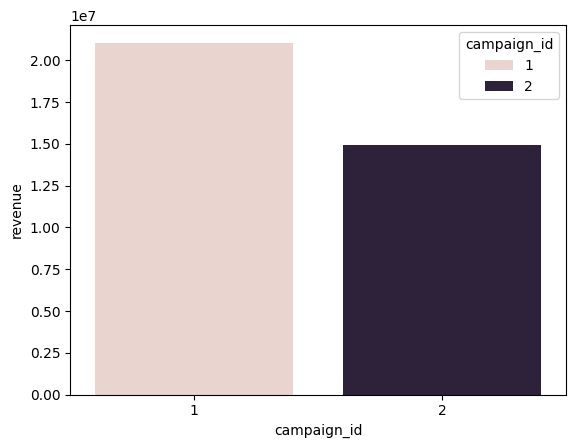

In [92]:
sns.barplot(data= revenue_df, x= 'campaign_id', y= 'revenue', hue= 'campaign_id')

(array([ 4.,  4.,  4., 10., 10.,  9.,  4.,  2.,  1.,  1.]),
 array([262500., 278750., 295000., 311250., 327500., 343750., 360000.,
        376250., 392500., 408750., 425000.]),
 <BarContainer object of 10 artists>)

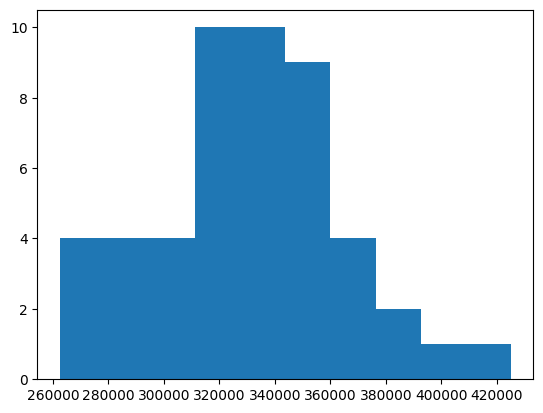

In [93]:
plt.hist(daily_counts_cvr[('total_sales', 1)])

(array([ 5.,  4.,  7.,  7., 12.,  6.,  1.,  5.,  1.,  1.]),
 array([182142.85714286, 196250.        , 210357.14285714, 224464.28571429,
        238571.42857143, 252678.57142857, 266785.71428571, 280892.85714286,
        295000.        , 309107.14285714, 323214.28571429]),
 <BarContainer object of 10 artists>)

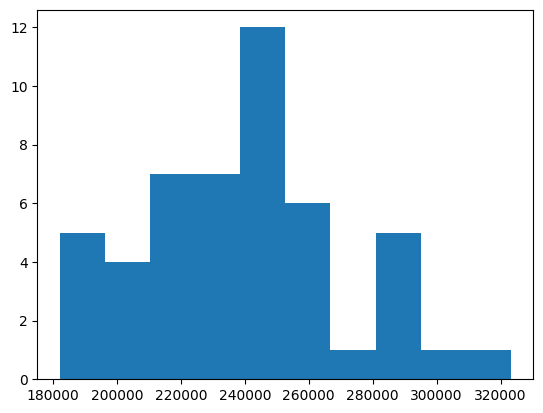

In [94]:
plt.hist(daily_counts_cvr[('total_sales', 2)])

<Axes: xlabel='date_result'>

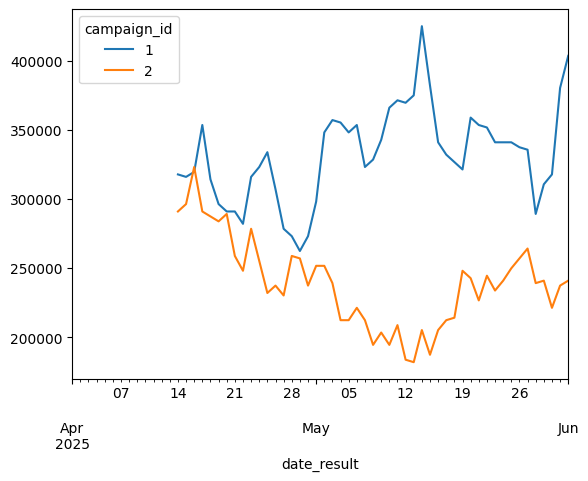

In [95]:
daily_counts_cvr['total_sales'].plot.line()

#### Campaign cost exploration

In [96]:
daily_counts_campaign = campaign_budget.copy()
daily_counts_campaign_user = main_df.copy()
daily_counts_checkout_user = cleaned_checkout.copy()

daily_counts_campaign = daily_counts_campaign.groupby(['date', 'campaign_id'])['budget'].sum().reset_index()
daily_counts_campaign_user = daily_counts_campaign_user[daily_counts_campaign_user['is_click'] == 1].groupby(['date_result', 'campaign_id'])['user_id'].nunique().reset_index()
daily_counts_checkout_user = daily_counts_checkout_user[(daily_counts_checkout_user['is_click'] == 1) & (daily_counts_checkout_user['is_checkout'] == 1)].groupby(['date_result', 'campaign_id'])['checkout_id'].nunique().reset_index()
daily_counts_campaign_user = daily_counts_campaign_user.rename(columns={'date_result' : 'date'})
daily_counts_checkout_user = daily_counts_checkout_user.rename(columns={'date_result' : 'date'})
daily_counts_campaign = pd.pivot(daily_counts_campaign, index= 'date', columns= 'campaign_id', values= ['budget'])
daily_counts_campaign = daily_counts_campaign.rolling(window= 14).mean()
daily_counts_campaign_user = pd.pivot(daily_counts_campaign_user, index= 'date', columns= 'campaign_id', values= ['user_id'])
daily_counts_campaign_user = daily_counts_campaign_user.rolling(window= 14).mean()
daily_counts_checkout_user = pd.pivot(daily_counts_checkout_user, index= 'date', columns= 'campaign_id', values= ['checkout_id'])
daily_counts_checkout_user = daily_counts_checkout_user.rolling(window= 14).mean()

In [97]:
daily_counts_checkout_user

checkout_id          
campaign_id           1         2
date                             
2025-04-01          NaN       NaN
2025-04-02          NaN       NaN
2025-04-03          NaN       NaN
2025-04-04          NaN       NaN
2025-04-05          NaN       NaN
...                 ...       ...
2025-05-28     3.357143  4.428571
2025-05-29     3.571429  4.500000
2025-05-30     3.714286  4.142857
2025-05-31     4.357143  4.571429
2025-06-01     4.642857  4.714286

[62 rows x 2 columns]

<Axes: xlabel='date'>

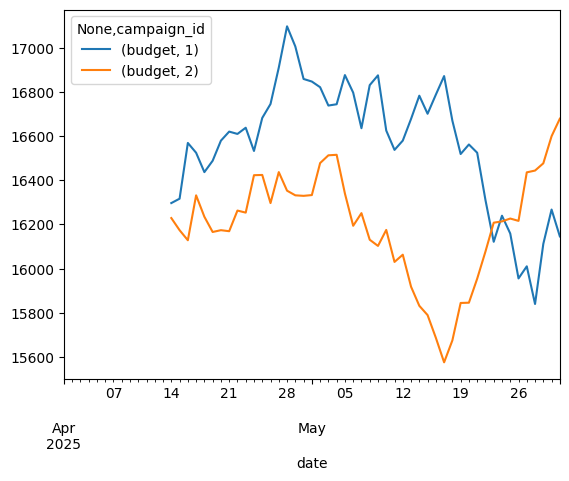

In [98]:
daily_counts_campaign.plot.line()

In [99]:
daily_counts_campaign[('cpl', 1)] = daily_counts_campaign[('budget', 1)] / daily_counts_campaign_user[('user_id', 1)]
daily_counts_campaign[('cpl', 2)] = daily_counts_campaign[('budget', 2)] / daily_counts_campaign_user[('user_id', 2)]
daily_counts_campaign[('cac', 1)] = daily_counts_campaign[('budget', 1)] / daily_counts_checkout_user[('checkout_id', 1)]
daily_counts_campaign[('cac', 2)] = daily_counts_campaign[('budget', 2)] / daily_counts_checkout_user[('checkout_id', 2)]

In [100]:
daily_counts_campaign

budget                       cpl                      cac  \
campaign_id             1             2           1           2            1   
date                                                                           
2025-04-01            NaN           NaN         NaN         NaN          NaN   
2025-04-02            NaN           NaN         NaN         NaN          NaN   
2025-04-03            NaN           NaN         NaN         NaN          NaN   
2025-04-04            NaN           NaN         NaN         NaN          NaN   
2025-04-05            NaN           NaN         NaN         NaN          NaN   
...                   ...           ...         ...         ...          ...   
2025-05-27   16010.642857  16435.571429  508.274376  562.586797  4482.980000   
2025-05-28   15840.214286  16443.714286  509.800000  571.245658  4718.361702   
2025-05-29   16112.142857  16476.428571  508.040541  559.878641  4511.400000   
2025-05-30   16267.357143  16599.000000  510.634529  558.620192  4379.673077   
2025-05-31   16146.000000  16678.357143  516.082192  558.605263  3705.639344   

                          
campaign_id            2  
date                      
2025-04-01           NaN  
2025-04-02           NaN  
2025-04-03           NaN  
2025-04-04           NaN  
2025-04-05           NaN  
...                  ...  
2025-05-27   3383.794118  
2025-05-28   3713.096774  
2025-05-29   3661.428571  
2025-05-30   4006.655172  
2025-05-31   3648.390625  

[61 rows x 6 columns]

<Axes: xlabel='date'>

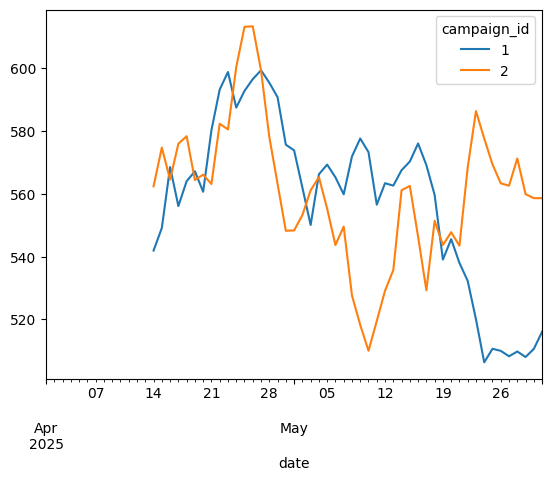

In [101]:
daily_counts_campaign['cpl'].plot.line()

<Axes: xlabel='date'>

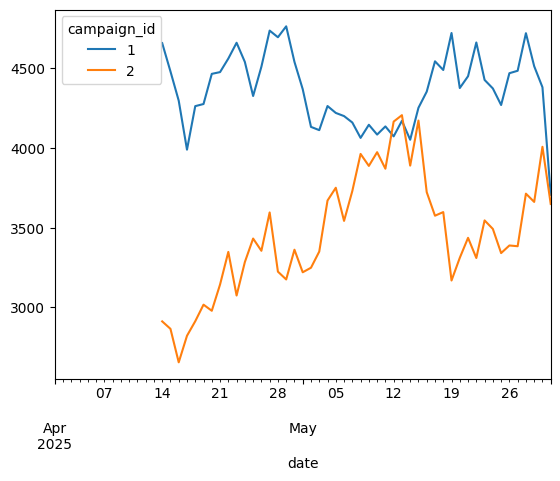

In [102]:
daily_counts_campaign['cac'].plot.line()

In [103]:
total_interaction_a = len(main_df[main_df['campaign_id'] == 1]['user_id'])
total_interaction_b = len(main_df[main_df['campaign_id'] == 2]['user_id'])

num_leads_a = len(main_df[(main_df['campaign_id'] == 1) & (main_df['is_click'] == 1)]['user_id'].unique())
num_leads_b = len(main_df[(main_df['campaign_id'] == 2) & (main_df['is_click'] == 1)]['user_id'].unique())

total_buyer_a = int(num_leads_a * conversion_rate_a)
total_buyer_b = int(num_leads_b * conversion_rate_b)

total_budget_campaign_A , total_budget_campaign_B = sum(campaign_budget[campaign_budget['campaign_id'] == 1]['budget']), sum(campaign_budget[campaign_budget['campaign_id'] == 2]['budget']) 
total_budget = [total_budget_campaign_A, total_budget_campaign_B]

print(f"Total interactions campaign A : {total_interaction_a}")
print(f"Total interactions campaign B : {total_interaction_b}")
print(f"Total budget campaign A : {total_budget_campaign_A}")
print(f"Total budget campaign B : {total_budget_campaign_B}")
print(f"Num leads campaign A : {num_leads_a}")
print(f"Num leads campaign B : {num_leads_b}")

cpl_a, cpl_b = calculate_cpl(main_df, total_budget)
print(f"CPL campaign A : {round(cpl_a, 2)}")
print(f"CPL campaign B : {round(cpl_b, 2)}")

cac_a, cac_b = calculate_cac(main_df, total_budget)
print(f"CAC campaign A : {round(cac_a, 2)}")
print(f"CAC campaign B : {round(cac_b, 2)}")

Total interactions campaign A : 13563
Total interactions campaign B : 12904
Total budget campaign A : 1009572
Total budget campaign B : 992090
Num leads campaign A : 1858
Num leads campaign B : 1799
CPL campaign A : 543.36
CPL campaign B : 551.47
CAC campaign A : 3809.71
CAC campaign B : 3071.49


<Axes: xlabel='campaign_id', ylabel='total_budget'>

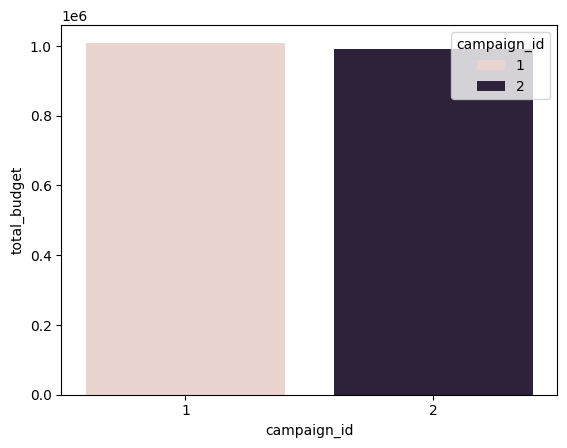

In [104]:
budget_df = pd.DataFrame({'campaign_id' : [1,2], 'total_budget' : [total_budget_campaign_A, total_budget_campaign_B]})
sns.barplot(data= budget_df, x= 'campaign_id', y='total_budget', hue= 'campaign_id')

In [105]:
result_metrics = pd.DataFrame({
    'campaign_id' : [1, 2],
    'total_interaction' : [total_interaction_a, total_interaction_b],
    'engagement_rate' : [engagement_rate_a, engagement_rate_b],
    'ctr' : [ctr_a, ctr_b],
    'cvr' : [conversion_rate_a, conversion_rate_b],
    'qty' : [int(qty_a), int(qty_b)],
    'total_buyer' : [total_buyer_a, total_buyer_b],
    'revenue' : [revenue_a, revenue_b],
    'total_budget' : [total_budget_campaign_A, total_budget_campaign_B],
    'leads' : [num_leads_a, num_leads_b],
    'cpl' : [cpl_a, cpl_b],
    'cac' : [cac_a, cac_b]
})

result_metrics

,campaign_id,total_interaction,engagement_rate,ctr,cvr,qty,total_buyer,revenue,total_budget,leads,cpl,cac
0,1,13563,0.136990,0.136990,0.154921,842,287,21050000.0,1009572,1858,543.364909,3809.705660
1,2,12904,0.139414,0.139414,0.193063,597,347,14925000.0,992090,1799,551.467482,3071.486068


### Statistical Test

In [106]:
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind 

In [107]:
# Engagement Rate
'''
H1 : Campaign 2 has higher engagement rate
H0 : Campaign 2 engagement rate isn't significantly different from campaign 1
'''
alpha = 0.05
engaged = [int(engagement_rate_a * total_interaction_a), int(engagement_rate_b * total_interaction_b)]
n_engaged = [total_interaction_a, total_interaction_b]
z_stat_eng, p_val_eng = proportions_ztest(engaged, n_engaged, alternative= 'smaller')
print(f"z_score : {z_stat_eng:.3f}")
print(f"p_val : {p_val_eng:.3f}")

if p_val_eng < alpha :
    print("Reject H0, means campaign 2 has higher engagment rate")
else :
    print("Accept H0, means campaign 2 engagement rate isn't significantly different from campaign 1")

z_score : -0.589
p_val : 0.278
Accept H0, means campaign 2 engagement rate isn't significantly different from campaign 1


In [108]:
# Conversion Rate
'''
H1 : Campaign 2 has higher conversion rate
H0 : Campaign 2 conversion rate isn't significantly different from campaign 1
'''
alpha = 0.05
converted = [int(conversion_rate_a * num_leads_a), int(conversion_rate_b * num_leads_b)]
n_converted = [num_leads_a, num_leads_b]
z_stat_conv, p_val_conv = proportions_ztest(converted, n_converted, alternative= 'smaller')
print(f"z_score : {z_stat_conv:.3f}")
print(f"p_val : {p_val_conv:.3f}")

if p_val_conv < alpha :
    print("Reject H0, means campaign 2 has higher conversion rate")
else :
    print("Accept H0, means campaign 2 conversion rate isn't significantly different from campaign 1")

z_score : -3.068
p_val : 0.001
Reject H0, means campaign 2 has higher conversion rate


In [109]:
# CPL 

'''
H1 : Campaign 2 has higher CPL
H0 : Campaign 2 CPL isn't significantly different from campaign 1
'''
alpha = 0.05
cpl_1 = daily_counts_campaign[~daily_counts_campaign[('cpl',1)].isna()][('cpl', 1)]
cpl_2 = daily_counts_campaign[~daily_counts_campaign[('cpl',2)].isna()][('cpl', 2)]

stat, p_val_cpl = ttest_ind(cpl_1, cpl_2, equal_var= False)
print(f"T test = {stat:.2f}, p_val = {p_val_cpl:.4f}")

if p_val_cpl < alpha:
    print("Reject H0, means campaign 2 has higher CPL")
else:
    print("Accept H0, means camppaign 2 CPL isn't significantly different from campaign 2")

T test = -0.57, p_val = 0.5716
Accept H0, means camppaign 2 CPL isn't significantly different from campaign 2


In [110]:
cv_engg_a, cv_engg_b = daily_counts_eng['engagement_rate'].std() / daily_counts_eng['engagement_rate'].mean()
cv_cvr_a, cv_cvr_b = daily_counts_cvr['cvr'].std() / daily_counts_cvr['cvr'].mean()

print(f"Coefficient of Variation engagement rate campaign 1 : {cv_engg_a:.3f}")
print(f"Coefficient of Variation engagement rate campaign 2 : {cv_engg_b:.3f}")
print(f"Coefficient of Variation conversion rate campaign 1 : {cv_cvr_a:.3f}")
print(f"Coefficient of Variation conversion rate campaign 2 : {cv_cvr_b:.3f}")

Coefficient of Variation engagement rate campaign 1 : 0.023
Coefficient of Variation engagement rate campaign 2 : 0.044
Coefficient of Variation conversion rate campaign 1 : 0.069
Coefficient of Variation conversion rate campaign 2 : 0.126


### Estimate marketing budget

In [111]:
# In this scenario we'll try to get 1000 leads and 1000 new customer / buyer 

estimate_budget_leads_campaign_1 = estimate_marketing_budget(1000, 'leads', cpl_a, cac_a)
estimate_budget_leads_campaign_2 = estimate_marketing_budget(1000, 'leads', cpl_b, cac_b)
estimate_budget_customer_campaign_1 = estimate_marketing_budget(1000, 'customer', cpl_a, cac_a)
estimate_budget_customer_campaign_2 = estimate_marketing_budget(1000, 'customer', cpl_b, cac_b)

print(f"Estimate marketing budget campaign 1 by leads : {estimate_budget_leads_campaign_1:.2f}")
print(f"Estimate marketing budget campaign 2 by leads : {estimate_budget_leads_campaign_2:.2f}")
print(f"Estimate marketing budget campaign 1 by customer : {estimate_budget_customer_campaign_1:.2f}")
print(f"Estimate marketing budget campaign 2 by customer : {estimate_budget_customer_campaign_2:.2f}")

Estimate marketing budget campaign 1 by leads : 543364.91
Estimate marketing budget campaign 2 by leads : 551467.48
Estimate marketing budget campaign 1 by customer : 3809705.66
Estimate marketing budget campaign 2 by customer : 3071486.07
